# OSM data analysis of Hotels

This python notebook analyses hotel data within Kathmandu. First, OSM data within a given geojson bounds is extracted using the `osmnx` package. After this, by making requests to the Overpass API, we look at the latest date at which each entity is modified. Finally, after joining these two datasets, we generate summary statisics and time series plots to understand attribute coverage and data recency.

In [10]:
import os
import numpy as np
import requests
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap


boundary_file = "kathmandu.geojson"
tags = {"tourism": "hotel"}
filename = "hotels"
completeness_tags = ["name", "stars", "opening_hours", "phone","email", "beds", "rooms"]

In [2]:
kathmandu_valley = gpd.read_file(boundary_file)

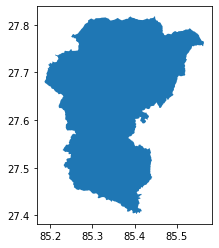

In [3]:
# create the plot
kathmandu_valley.plot()
north=kathmandu_valley.bounds['maxy'].values.item()
south=kathmandu_valley.bounds['miny'].values.item()
east=kathmandu_valley.bounds['maxx'].values.item()
west=kathmandu_valley.bounds['minx'].values.item()

In [4]:
osm_data=ox.geometries_from_bbox(north, south, east, west,tags)
timestamp = pd.DataFrame({'unique_id': [], 'timestamp': []})

entitylist = osm_data['unique_id'].to_list()
for entity in entitylist:
    index = entitylist.index(entity)
    overpass_url = "http://overpass-api.de/api/interpreter"
    feat_type = entity.split("/")[0]
    feat_id = entity.split("/")[1]
    query = f'[out:json][timeout:25];({feat_type}({feat_id}););out meta;'
    r = requests.get(overpass_url, params={'data': query})
    try:
        element = r.json()['elements'][0]
        timestamp = timestamp.append({'unique_id': entity, 'timestamp': element['timestamp']}, ignore_index=True)
        print(str(index) +" __ "+ str(entity) +" __ "+ element['timestamp'])
    except:
        print("Exception: " + str(entity))
        
del(osm_data["geometry"])
final = pd.merge(osm_data, timestamp, how='inner', on='unique_id')        
# final.to_csv(path_or_buf=filename, sep=",", index=False)

0 __ node/316984536 __ 2011-11-14T05:05:45Z
1 __ node/317040754 __ 2017-06-04T02:52:48Z
2 __ node/339102258 __ 2009-03-01T11:31:41Z
3 __ node/354456043 __ 2020-07-17T11:30:44Z
4 __ node/553319545 __ 2009-11-03T19:46:11Z
5 __ node/558561826 __ 2018-02-20T03:43:33Z
6 __ node/671300772 __ 2014-08-15T01:23:18Z
7 __ node/845563398 __ 2015-04-30T09:13:42Z
8 __ node/849979315 __ 2018-08-28T20:09:45Z
9 __ node/849979321 __ 2011-11-14T05:05:46Z
10 __ node/943246297 __ 2018-11-02T03:19:53Z
11 __ node/943246301 __ 2010-10-10T07:16:23Z
12 __ node/943246319 __ 2011-07-04T22:07:27Z
13 __ node/943246321 __ 2011-07-04T22:07:27Z
14 __ node/943246322 __ 2011-07-04T22:07:27Z
15 __ node/943246323 __ 2018-09-16T09:48:18Z
16 __ node/943246324 __ 2011-07-04T21:47:02Z
17 __ node/949307742 __ 2015-04-07T09:38:16Z
18 __ node/949307744 __ 2015-04-07T09:38:16Z
19 __ node/992508275 __ 2010-11-17T09:45:15Z
20 __ node/992508276 __ 2017-03-13T01:53:06Z
21 __ node/1114720610 __ 2019-03-24T03:19:06Z
22 __ node/13410292

178 __ node/4324802381 __ 2016-07-28T07:30:23Z
179 __ node/4324884018 __ 2016-07-28T09:13:45Z
180 __ node/4326344090 __ 2016-07-29T01:31:09Z
181 __ node/4363030843 __ 2016-08-23T15:11:22Z
182 __ node/4363030846 __ 2016-08-23T15:11:23Z
183 __ node/4366423060 __ 2016-08-25T17:30:38Z
184 __ node/4366606664 __ 2016-08-25T17:11:35Z
185 __ node/4383009215 __ 2016-09-04T08:28:31Z
186 __ node/4388632689 __ 2016-09-07T05:02:53Z
187 __ node/4400952494 __ 2016-09-14T10:38:18Z
188 __ node/4400954923 __ 2016-09-14T10:20:15Z
189 __ node/4400954924 __ 2019-10-06T18:54:22Z
190 __ node/4400954925 __ 2016-09-14T10:20:16Z
191 __ node/4416279337 __ 2018-11-28T05:16:09Z
192 __ node/4440620350 __ 2016-10-10T13:15:41Z
193 __ node/4454912992 __ 2016-12-14T12:42:51Z
194 __ node/4454928889 __ 2016-10-19T11:32:12Z
195 __ node/4458642590 __ 2016-10-22T01:08:02Z
196 __ node/4459877595 __ 2016-10-23T03:34:44Z
197 __ node/4470911792 __ 2016-10-30T05:48:00Z
198 __ node/4488310389 __ 2016-11-08T09:05:46Z
199 __ node/4

353 __ node/5921939644 __ 2018-09-22T05:38:52Z
354 __ node/5938724288 __ 2018-09-29T12:36:49Z
355 __ node/5940036904 __ 2019-12-06T13:26:07Z
356 __ node/5957922485 __ 2018-10-05T13:27:55Z
357 __ node/6012276785 __ 2018-10-25T09:36:26Z
358 __ node/6015760490 __ 2018-10-26T16:26:54Z
359 __ node/6022285585 __ 2018-10-29T13:38:55Z
360 __ node/6022671385 __ 2018-10-29T15:53:14Z
361 __ node/6024654886 __ 2018-10-30T11:20:56Z
362 __ node/6026810885 __ 2018-10-31T08:43:10Z
363 __ node/6026810985 __ 2018-10-31T08:43:11Z
364 __ node/6027482067 __ 2018-10-31T14:13:12Z
365 __ node/6031122710 __ 2018-11-28T10:59:17Z
366 __ node/6031122719 __ 2018-11-02T03:25:01Z
367 __ node/6046725209 __ 2018-11-08T16:12:25Z
368 __ node/6048863985 __ 2018-11-29T07:33:06Z
369 __ node/6049080487 __ 2018-11-09T14:23:53Z
370 __ node/6068070386 __ 2018-11-17T09:05:02Z
371 __ node/6078491485 __ 2019-03-27T21:26:36Z
372 __ node/6082824386 __ 2018-11-22T14:22:23Z
373 __ node/6098516490 __ 2018-11-28T08:20:45Z
374 __ node/6

531 __ way/303270336 __ 2014-09-14T06:15:56Z
532 __ way/310927859 __ 2018-11-12T11:08:58Z
533 __ way/326315135 __ 2020-05-11T18:03:27Z
534 __ way/329424295 __ 2015-05-31T13:53:06Z
535 __ way/329427957 __ 2015-02-21T10:49:15Z
536 __ way/334271123 __ 2018-11-27T05:08:03Z
537 __ way/338958627 __ 2018-09-02T11:24:12Z
538 __ way/340769737 __ 2019-02-07T09:51:07Z
539 __ way/341062679 __ 2017-08-21T09:52:02Z
540 __ way/341086315 __ 2019-02-27T09:22:52Z
541 __ way/341365032 __ 2017-01-13T08:47:18Z
542 __ way/341434242 __ 2018-11-28T07:47:13Z
543 __ way/341670100 __ 2018-12-06T09:12:02Z
544 __ way/341709495 __ 2019-10-06T18:54:22Z
545 __ way/341851338 __ 2018-01-21T17:34:35Z
546 __ way/342956584 __ 2015-05-05T12:02:52Z
547 __ way/342973332 __ 2019-03-01T05:48:20Z
548 __ way/343325589 __ 2017-11-12T12:54:41Z
549 __ way/343334077 __ 2019-09-05T03:57:06Z
550 __ way/368382781 __ 2015-08-31T02:48:22Z
551 __ way/368384852 __ 2019-11-07T09:20:00Z
552 __ way/371453734 __ 2019-03-20T20:16:20Z
553 __ way

## Tag completeness

In this section, the entire OSM dataset is checked for completeness based on availability of the following standard tags (key value pairs) for hotels. In addition, a completeness score is also assigned for each individual entity based on the availaibility of the following tags.   

| Information     | Key           | Value             |
|-----------------|---------------|-------------------|
| Infrastructure  | tourism       | hotel             |
| Name            | name          | Name of hotel     |
| Number of stars | stars         | Number of stars   |
| Opening hours   | opening_hours | Mo-Fr 10:00-17:00 |
| Phone           | phone         | Ph no.            |
| Email           | email         | email address     |
| Number of beds  | beds          | number_of_beds    |
| Number of Rooms | rooms         | number_of_rooms   |

In [5]:
completeness = pd.DataFrame({'tag': [], 'completeness_percentage': []})

total_entries = len(final)
for tag in completeness_tags:
    if tag in final.columns:
        nulls = final[tag].isna().sum()  
        completeness = completeness.append({'tag': tag,'completeness_percentage': ((total_entries - nulls)/total_entries)*100}, ignore_index=True)
    else:
        completeness = completeness.append({'tag': tag,'completeness_percentage': 0.0 }, ignore_index=True)
        

/home/arogya/projects/c2m2/osm_analysis/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 7 artists>

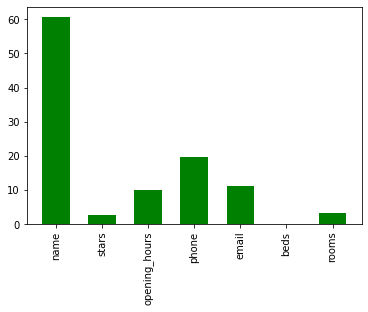

In [6]:
import matplotlib.pyplot as plt 
x = completeness.tag
y = completeness.completeness_percentage

plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])

In [11]:
completeness_scores =  pd.DataFrame({'unique_id': [], 'completeness_score': []})
for index, row in final.iterrows():
    total_tags = len(completeness_tags)
    count = 0
    
    for tag in completeness_tags:
        if tag in final.columns:
            if row[tag] is None:
                count = count
            else:
                count = count + 1
    completeness_scores = completeness_scores.append({'unique_id': row.unique_id, 'completeness_score': count/total_tags}, ignore_index=True)

final = pd.merge(final, completeness_scores, how='inner', on='unique_id')        
final.to_csv(path_or_buf=filename+".csv", sep=",", index=False)
completeness.to_csv(path_or_buf=filename+"_completeness.csv", sep=",", index=False)

## Data recency

In this section, the entire OSM dataset is checked for recency.

<BarContainer object of 91 artists>

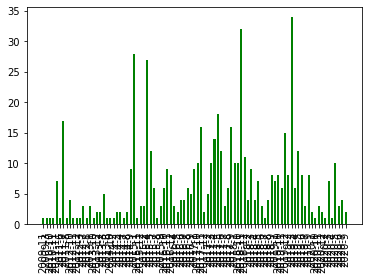

In [12]:
final.timestamp = pd.to_datetime(final.timestamp)
final['YearMonth'] =final['timestamp'].apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
# final.groupby('YearMonth')
counts = final.value_counts(subset=['YearMonth']).rename_axis('unique_values').reset_index(name='counts')
counts = counts.sort_values(by="unique_values")
counts.to_csv(path_or_buf=filename+"_counts.csv", sep=",", index=False)

x = counts.unique_values
y = counts.counts

plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])

<BarContainer object of 12 artists>

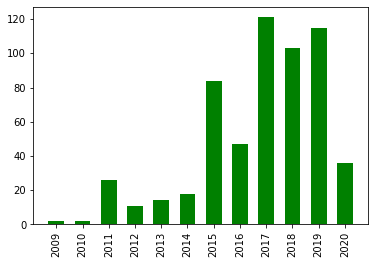

In [9]:
final.timestamp = pd.to_datetime(final.timestamp)
final['Year'] = final['timestamp'].apply(lambda x: '{year}'.format(year=x.year))
# final.groupby('YearMonth')

year_counts = final.value_counts(subset=['Year']).rename_axis('unique_values').reset_index(name='counts')
year_counts = year_counts.sort_values(by="unique_values")


x = year_counts.unique_values
y = year_counts.counts


plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])